In [1]:
from pathlib import Path
from Bio import SeqIO
from Bio.Seq import Seq

import numpy as np


In [2]:
from matplotlib import pyplot as plt

In [3]:
data_root = Path('../data/')
fasta_files=[fasta_file for fasta_file in data_root.rglob('*.fna')]

In [4]:
genome_sequences=[]
idgenome2seq={}
for file in fasta_files:
    record = next(SeqIO.parse(file, 'fasta'))
    print(file)
    print('Sequence id: '+record.id+', which is %d bp long'%len(record.seq))
    print('\n')
    genome_sequences.append(record.seq)
    idgenome2seq[record.id]=record.seq

../data/GCF_003586045.1_E.coli_isolate/GCF_003586045.1_E.coli_isolate_genomic.fna
Sequence id: NZ_CP019953.1, which is 5108794 bp long


../data/GCF_900618295.1_ecoli019/GCF_900618295.1_ecoli019_genomic.fna
Sequence id: NZ_LR130532.1, which is 5009390 bp long


../data/GCF_041870075.1_Escherichia_coli_M2021-10044802_2_E/GCF_041870075.1_Escherichia_coli_M2021-10044802_2_E_genomic.fna
Sequence id: NZ_CP163451.1, which is 5229313 bp long


../data/GCF_901733115.1_Escherichia_coli_MAD/GCF_901733115.1_Escherichia_coli_MAD_genomic.fna
Sequence id: NZ_LR595691.1, which is 4747851 bp long


../data/GCF_000981485.1_EcoliK12AG100/GCF_000981485.1_EcoliK12AG100_genomic.fna
Sequence id: NZ_LN832404.1, which is 4638126 bp long


../data/GCF_000273425.1_Esch_coli_MG12655_V1/GCF_000273425.1_Esch_coli_MG12655_V1_genomic.fna
Sequence id: NZ_AKVX01000001.1, which is 4638970 bp long


../data/GCF_000269645.1_PB_Esch_coli_MG12655_V1/GCF_000269645.1_PB_Esch_coli_MG12655_V1_genomic.fna
Sequence id: NZ_AKBV01

## Objective: use NZ_LN832404.1 to annotate NZ_CP163451.1

In [5]:
ref_seq = idgenome2seq['NZ_LN832404.1']
target_seq = idgenome2seq['NZ_CP163451.1']

In [6]:
# reference genome
gff_file = '../data/GCF_000981485.1_EcoliK12AG100/GCF_000981485.1_EcoliK12AG100_protein.gff'
gene_pos_starts_ref=[]
for line in [line for line in open(gff_file).readlines() if line[0] != '#']:
    content=line.split()
    if content[0] == 'NZ_LN832404.1' and content[2] == 'gene' and content[6] == '+':
        gene_pos_starts_ref.append(int(content[3]))

In [7]:
print(len(gene_pos_starts_ref))

2125


In [8]:
# target genome
gff_file = '../data/GCF_041870075.1_Escherichia_coli_M2021-10044802_2_E/GCF_041870075.1_Escherichia_coli_M2021-10044802_2_E_protein.gff'
gene_pos_starts_target=[]
for line in [line for line in open(gff_file).readlines() if line[0] != '#']:
    content=line.split()
    if content[0] == 'NZ_CP163451.1' and content[2] == 'gene' and content[6] == '+':
        gene_pos_starts_target.append(int(content[3]))

In [9]:
print(len(gene_pos_starts_target))

2352


### Why a naive approach consisting in lookling for the same subsequences is not going to work

In [10]:
gene_codon_starts=[]
gene_subseq_starts={l:[] for l in [3,6,9,12,15]}
for start in gene_pos_starts_ref:
    gene_codon_starts.append(ref_seq[start-1:start+2])
    for l in [3,6,9,12,15]:
        gene_subseq_starts[l].append(ref_seq[start-1:start+l-1])

In [11]:
for start in sorted(set(gene_codon_starts), key=lambda start: -gene_codon_starts.count(start)):
    print(start, '%.4f'%(gene_codon_starts.count(start)/len(gene_codon_starts)))

ATG 0.8725
GTG 0.0762
TTG 0.0151
GGG 0.0066
GCG 0.0042
GGT 0.0028
CCT 0.0024
AAA 0.0024
GTC 0.0019
GCC 0.0019
GGA 0.0019
ATT 0.0019
CGC 0.0014
TCC 0.0014
AGG 0.0014
CTG 0.0014
ATA 0.0009
CGG 0.0009
ACG 0.0005
TGT 0.0005
TGC 0.0005
TAC 0.0005
GCT 0.0005
GGC 0.0005


In [12]:
ref_seq.count('ATG')

76282

In [13]:
length=6
for subseq in sorted(set(gene_subseq_starts[length]), key=lambda subseq: -gene_subseq_starts[length].count(subseq)):
    print(subseq, '%.4f'%(gene_subseq_starts[length].count(subseq)/len(gene_subseq_starts[3])))

ATGAAA 0.1045
ATGAAT 0.0452
ATGAGC 0.0372
ATGAGT 0.0329
ATGGAA 0.0296
ATGAAC 0.0282
ATGACA 0.0273
ATGATT 0.0268
ATGGCT 0.0264
ATGGCA 0.0254
ATGACC 0.0240
ATGACG 0.0240
ATGTCT 0.0231
ATGAAG 0.0226
ATGCAA 0.0202
ATGCGT 0.0202
ATGTCA 0.0188
ATGATG 0.0184
ATGACT 0.0174
ATGGAT 0.0169
ATGCTG 0.0160
ATGTTT 0.0151
ATGATC 0.0141
GTGAAA 0.0136
ATGCGC 0.0136
ATGTCC 0.0132
ATGTTG 0.0122
ATGGCG 0.0122
ATGCAG 0.0118
ATGTTA 0.0118
ATGTCG 0.0113
ATGTTC 0.0094
ATGCCA 0.0094
ATGAGA 0.0089
ATGCAT 0.0080
ATGCGA 0.0080
ATGCCT 0.0080
ATGGCC 0.0075
ATGGGT 0.0075
ATGGAC 0.0071
ATGCTC 0.0071
ATGGTA 0.0066
ATGATA 0.0052
GTGAAT 0.0047
ATGCTT 0.0047
ATGGGA 0.0047
ATGCCG 0.0047
ATGTAT 0.0042
ATGTAC 0.0042
ATGTGG 0.0042
ATGGTT 0.0042
GTGATT 0.0042
ATGCTA 0.0038
ATGGTG 0.0033
GTGAAC 0.0033
GTGGCG 0.0033
ATGCAC 0.0033
ATGGAG 0.0033
GTGAAG 0.0028
GGGTCG 0.0028
GTGAGC 0.0028
GTGAGT 0.0028
GTGACC 0.0028
GTGGCT 0.0024
ATGGTC 0.0024
CCTGGC 0.0024
GGTTAA 0.0024
AAATTG 0.0024
GGGTGA 0.0024
ATGCCC 0.0019
ATGTGC 0.0019
TTGTTT

In [14]:
ref_seq.count('ATGAAA')/gene_subseq_starts[6].count('ATGAAA')

9.342342342342342

In [15]:
length=15
for subseq in sorted(set(gene_subseq_starts[length]), key=lambda subseq: -gene_subseq_starts[length].count(subseq)):
    print(subseq, '%.4f'%(gene_subseq_starts[length].count(subseq)/len(gene_subseq_starts[3])))

GGGTCGTTAGCTCAG 0.0028
AAATTGAAGAGTTTG 0.0024
GGGTGATTAGCTCAG 0.0024
GGTTAAGCGACTAAG 0.0024
TCCTCTGTAGTTCAG 0.0014
ATGAGCGGAAAACCG 0.0014
CGCGGGGTGGAGCAG 0.0014
ATGAATTACTCTCAC 0.0014
CCTGGCGGCAGTAGC 0.0014
ATGACAAAAACAGTA 0.0014
GTCCCCTTCGTCTAG 0.0014
GCGGGAATAGCTCAG 0.0014
ATGATTGATGTCTTA 0.0014
GGAGCGGTAGTTCAG 0.0014
ATGGCTTATAAACAC 0.0009
ATGAGACGAACATTT 0.0009
ATGGAACTTAAAAAA 0.0009
CCTGGCGGCCGTAGC 0.0009
ATGATGAAGCTCGTC 0.0009
GTGGCTTCTGTTTCT 0.0009
ATGTCTGGAAATATA 0.0009
ATGAGTAAGAAAATT 0.0009
ATGAGTCATCAACTT 0.0009
GGGGCTATAGCTCAG 0.0009
AGGCTTGTAGCTCAG 0.0009
ATGCAACCGTCCAGA 0.0005
ATGTCGCAGGCTGCT 0.0005
ATGATAACCAATACA 0.0005
ATGTCAGGAGAACAC 0.0005
ATGGAAAGTAATTTC 0.0005
ATGTTAGAGTTATTA 0.0005
ATGGCTGATTATGCG 0.0005
ATGAATCCACTGAAA 0.0005
ATGATCTGGCTAACA 0.0005
ATGGAATCCCTGACG 0.0005
ATGATCATTCGTGAC 0.0005
ATGACTTACATGAAA 0.0005
ATGACAAAATTACAA 0.0005
GTGCCCGTTATTGCC 0.0005
ATGCACGGTAATTCT 0.0005
ATGGGGCTTTGTAGT 0.0005
GTGTCCACTGCAAAC 0.0005
GTGAAAGAGATTATT 0.0005
ATGTTTTCCGC

In [16]:
ref_seq.count('ATGAAAAACATCAAT')/gene_subseq_starts[15].count('ATGAAAAACATCAAT')
print(ref_seq.count('ATGAAAAACATCAAT'))
print(target_seq.count('ATGAAAAACATCAAT'))

1
1


In [17]:
length=15
targetseq_in_gene_subseq_starts=[]
for start in gene_pos_starts_target:
    targetseq_in_gene_subseq_starts.append(target_seq[start-1:start+l-1] in gene_subseq_starts[length])
    if not target_seq[start-1:start+l-1] in gene_subseq_starts[length]:
        print(start)

4304
5228
10993
17332
17657
18226
22387
23162
31582
31869
36235
38065
52156
58830
59855
66258
71014
90760
118487
139549
152593
170052
175806
177643
189460
230984
235792
236078
240458
296023
313590
387453
418958
449852
453329
466192
529412
571203
587233
592072
595485
600642
604125
605150
607768
615201
631441
632591
638786
648274
649371
650178
651886
654598
677413
682586
683911
684211
689165
690400
691490
693883
694785
695991
696690
697321
698718
798353
798585
804426
811657
813429
821569
821984
827284
830508
830821
831215
832584
835463
835885
836266
862123
865933
874555
898997
917035
939461
945915
954583
967810
1011582
1013963
1020469
1035012
1049297
1082672
1127654
1128933
1129845
1130085
1130358
1130549
1131409
1137014
1138006
1140686
1160039
1207740
1267139
1291500
1292072
1292894
1293207
1293801
1310892
1311216
1320468
1321206
1321361
1321657
1322475
1323466
1323824
1324116
1324763
1371565
1380521
1406704
1423626
1446562
1446708
1480482
1492585
1497663
1515720
1523241
1546542
1559466

In [18]:
print('Misclasification rate: %.2f'%(1-np.mean(targetseq_in_gene_subseq_starts)))

Misclasification rate: 0.26


In [19]:
start=1477875
print('pdxI gene in reference:', ref_seq[start-1:start+14])

start=4304
print('pdxI gene in target:', target_seq[start-1:start+14])

pdxI gene in reference: ATGAGCAGCAATACA
pdxI gene in target: ATGAGCAGCAACACA


Concusion: you need large subsequences to avoid degeneracy but you face the problem of recognizing variations $\rightarrow$ a perfect case for machine laerning, more particulalry of discriminative task (classification)

## The simplest neuron-model: the perceptron
[The single-layer perceptron](../images/perceptron.jpg)

<img src="../images/perceptron.jpg" alt="The single-layer perceptron" width="400">

In [20]:
from sklearn.preprocessing import OneHotEncoder
alphabet = ['A', 'T', 'G', 'C']
encoder = OneHotEncoder(categories=[alphabet], dtype=int, sparse_output=False)

### 1. Creating input data from which the network (i.e W) will learn 


#### A.  Converting input categorical data into boolean values (onehot encoding)

Example

In [21]:
seq=np.array(list('ATGCGCC'))
print('Sequence:\n', seq, '\n')

seq=seq.reshape(-1,1)
print('Sequence converted into columns:\n', seq, '\n')

onehot_seq = encoder.fit_transform(seq)
print('Onehot encoding:\n', onehot_seq, '\n')

onehot_flat = onehot_seq.reshape(-1)
print('Onehot flat encoding:\n', onehot_flat, '\n')

Sequence:
 ['A' 'T' 'G' 'C' 'G' 'C' 'C'] 

Sequence converted into columns:
 [['A']
 ['T']
 ['G']
 ['C']
 ['G']
 ['C']
 ['C']] 

Onehot encoding:
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 1]] 

Onehot flat encoding:
 [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1] 



Automation

In [22]:
def onehot_flat_encoding(seq='A'):
    """Convert a DNA sequence into a flat onehot code"""
    seq = np.array(list(seq)).reshape(-1,1)
    onehot_seq = encoder.fit_transform(seq)
    return onehot_seq.reshape(-1)

In [23]:
# testing the onehot function
seq='ATG'
print(onehot_flat_encoding(seq))

[1 0 0 0 0 1 0 0 0 0 1 0]


Creating the input data : samples (X) and labels (y)

In [24]:
sequence_length=15

X=[] # samples
y=[] # labels 
for start in gene_pos_starts_ref:
    subseq=ref_seq[start-1:start+sequence_length-1]
    X.append(onehot_flat_encoding(subseq))
    y.append(1)
    
    shift = 99
    subseq=ref_seq[start+shift-1:start+shift+sequence_length-1]
    X.append(onehot_flat_encoding(subseq))
    y.append(0)


X=np.array(X)
print(X.shape)

y=np.array(y)
print(y.shape, y[:5])

(4250, 60)
(4250,) [1 0 1 0 1]


In [25]:
# some visu
print(X[0])

[1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1]


In [26]:
def perceptron_train(X, y, lr=0.1, iterations=10):
    """ Training the perceptron and computing the misclassification rate
        X: shape (n_samples, n_features (sequence length))
        y: labels in {0,1}
    """
    
    # Defining the perceptron
    W = np.zeros(X.shape[1])
    b = 0.0
    
    # misclassification rates
    miscls, miscls_genes, miscls_non_genes = [], [], []
     
    scores = np.dot(X, W) + b
    y_preds = np.where(scores > 0, 1, 0)
    miscls.append(np.mean(y_preds != y))
    miscls_genes.append(np.mean(y_preds[::2] != y[::2]))
    miscls_non_genes.append(np.mean(y_preds[1::2] != y[1::2]))
                    
    # iterating over iterations
    for _ in range(iterations):

        # iterating over the samples and labels
        for xi, yi in zip(X, y):
            # prediction
            y_pred = 1 if (np.dot(W, xi) + b) > 0 else 0

            # adjusting the perceptron
            W += lr * (yi - y_pred) * xi
            b += lr * (yi - y_pred)

        scores = np.dot(X, W) + b
        y_preds = np.where(scores > 0, 1, 0)
        miscls.append(np.mean(y_preds != y))
        miscls_genes.append(np.mean(y_preds[::2] != y[::2]))
        miscls_non_genes.append(np.mean(y_preds[1::2] != y[1::2]))
                      
    return W, b, miscls, miscls_genes, miscls_non_genes

In [27]:
W, b, miscls, miscls_genes, miscls_non_genes = perceptron_train(X, y, lr=0.01, iterations=100)

Text(0.5, 0, 'training iteration')

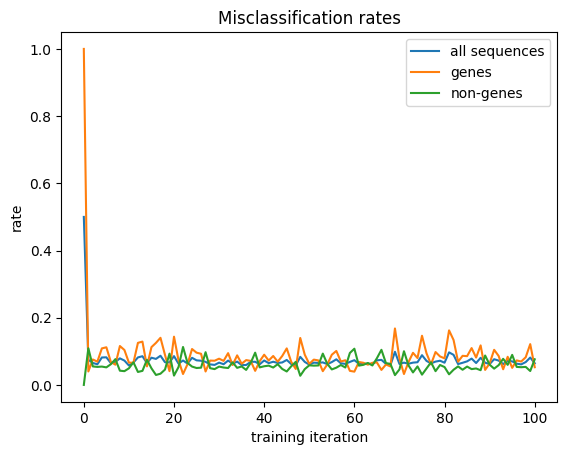

In [28]:
plt.plot(miscls, label='all sequences')
plt.plot(miscls_genes, label='genes')
plt.plot(miscls_non_genes, label='non-genes')

plt.legend(loc=1)
plt.title('Misclassification rates')
plt.ylabel('rate')
plt.xlabel('training iteration')

Text(0.5, 1.0, 'Weights')

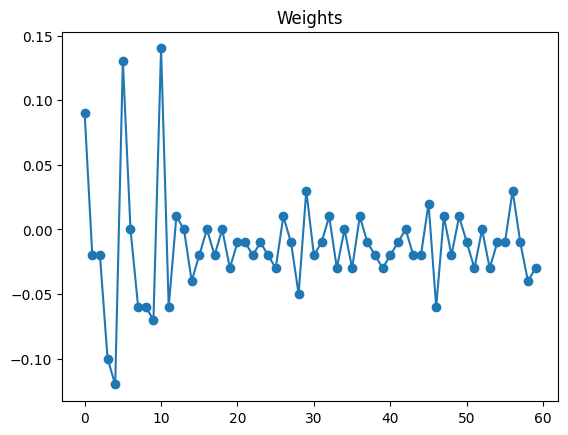

In [29]:
plt.plot(W,'o-')
plt.title('Weights')

Testing against the target genome

In [30]:
# labelling test data
y_test=[]

# prediction of labels
y_preds=[] #

for start in gene_pos_starts_target:

    # genes
    subseq=target_seq[start-1:start+sequence_length-1]
    y_test.append(1)

    x_test = onehot_flat_encoding(subseq)  
    y_pred = 1 if (np.dot(W, x_test) + b) > 0 else 0      
    y_preds.append(y_pred)
    
    #non-genes
    shift = 99
    y_test.append(0)

    subseq=target_seq[start+shift-1:start+shift+sequence_length-1]
    x_test = onehot_flat_encoding(subseq)        
    y_pred = 1 if (np.dot(W, x_test) + b) > 0 else 0      
    y_preds.append(y_pred)
    

In [31]:
print(y_test)
print(y_preds)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 

In [32]:
print('Misclasification rate: %.2f'%np.mean(np.array(y_preds)!=np.array(y_test)))

Misclasification rate: 0.07


## How to improve annotation?
- larger sequences to train
- larger input dataset
- multilayer percpetron $\rightarrow$ the rise of neural networks